# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.831294e+01     1.375682e+01
 * time: 0.0014138221740722656
     1     3.305340e+01     1.029064e+01
 * time: 0.006384849548339844
     2     2.762640e+01     4.450784e+00
 * time: 0.012131929397583008
     3     2.280424e+01     3.022737e+00
 * time: 0.017122983932495117
     4     2.066097e+01     1.882833e+00
 * time: 0.02198195457458496
     5     2.046170e+01     3.716947e+00
 * time: 0.02604389190673828
     6     2.001476e+01     1.761703e+00
 * time: 0.030893802642822266
     7     1.965545e+01     1.898131e+00
 * time: 0.03491783142089844
     8     1.915076e+01     1.542368e+00
 * time: 0.039029836654663086
     9     1.874317e+01     1.590558e+00
 * time: 0.043077945709228516
    10     1.830588e+01     1.487277e+00
 * time: 0.04708290100097656
    11     1.794793e+01     1.052128e+00
 * time: 0.05100703239440918
    12     1.765693e+01     1.000665e+00
 * time: 0.05508089065551758
    13     1.745884e+01     9.027353e-01


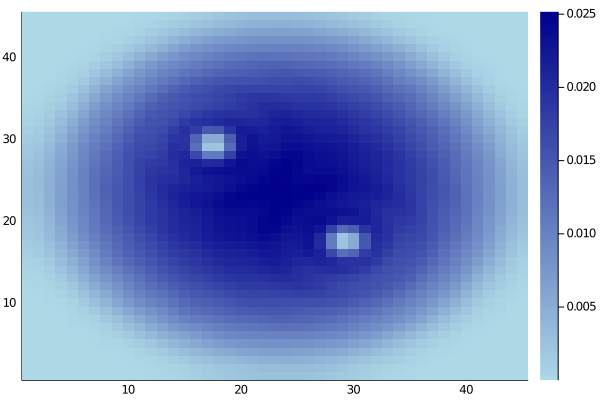

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)